In [1]:
# Loading vehicle data from source
parking_2016 = 'data/parking_2016.csv'
parking_2015 = 'data/parking_2015.csv'
parking_2014 = 'data/parking_2014.csv'

# Importing necessariy modules
import pandas as pd
from datetime import datetime
from pandas import to_datetime
import numpy as np
import matplotlib.pyplot as plt

# Import decision tree libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
import sklearn.metrics

# Setting up meaningful column headings
parking_16 = pd.read_csv(parking_2016, sep=',', decimal='.', header=None, names=['DeviceId', 'ArrivalTime', 'DepartureTime', 'DurationSeconds', 'StreetMarker', 'Sign', 'Area', 'StreetId', 'StreetName', 'BetweenStreet1', 'BetweenStreet2', 'Side Of Street', 'In Violation', 'Vehicle Present'])

# Loading data types to view type information for data cleaning
parking_16.dtypes

DeviceId             int64
ArrivalTime         object
DepartureTime       object
DurationSeconds      int64
StreetMarker        object
Sign                object
Area                object
StreetId           float64
StreetName          object
BetweenStreet1      object
BetweenStreet2      object
Side Of Street     float64
In Violation          bool
Vehicle Present       bool
dtype: object

In [2]:
# Loading labeled data to review and determine necessary clensing actions
parking_16.head(1048575)

,DeviceId,ArrivalTime,DepartureTime,DurationSeconds,StreetMarker,Sign,Area,StreetId,StreetName,BetweenStreet1,BetweenStreet2,Side Of Street,In Violation,Vehicle Present
0,14632,8/09/2016 15:59,8/09/2016 16:18,1164,13812N,LZ 30M M-SUN 7:30-18:30,Docklands,590.0,DOCKLANDS DRIVE,PEARL RIVER ROAD,WATERFRONT WAY,3.0,False,False
1,19325,12/26/2016 02:08:01 PM,12/26/2016 02:09:27 PM,86,3761S,1P TKT A M-SAT 7:30-18:30,The Mac,856.0,LA TROBE STREET,ELIZABETH STREET,SWANSTON STREET,4.0,False,False
2,15078,10/07/2016 7:30,10/07/2016 8:25,3300,9453S,1P TKT A M-F 7:30-18:30,Southbank,547.0,COVENTRY STREET,STURT STREET,DODDS STREET,4.0,False,False
3,13517,10/20/2016 08:24:40 AM,10/20/2016 08:40:21 AM,941,1596N,2P MTR M-F 7:30-16:00,Twin Towers,670.0,FLINDERS STREET,EXHIBITION STREET,SPRING STREET,3.0,False,True
4,19878,11/30/2016 01:42:36 PM,11/30/2016 02:19:39 PM,2223,7041S,1/4P M-SAT 7:30-19:30,Victoria Market,1346.0,THERRY STREET,QUEEN STREET,ELIZABETH STREET,4.0,True,True
5,14218,09/28/2016 07:10:53 PM,09/28/2016 07:13:01 PM,128,8885W,2P TKT A M-SAT 7:30-20:30,Southbank,202.0,CITY ROAD,KINGS WAY,POWER STREET,3.0,False,True
6,10045,5/03/2016 17:30,5/03/2016 17:48,1100,901W,3P MTR M-SAT 7:30-20:30,Library,1221.0,RUSSELL STREET,LA TROBE STREET,Lt LONSDALE STREET,5.0,False,True
7,13047,2/03/2016 21:56,2/03/2016 21:56,7,57W,NaN,Princes Theatre,1288.0,SPRING STREET,Lt BOURKE STREET,BOURKE STREET,5.0,False,False
8,16564,05/31/2016 07:30:00 AM,05/31/2016 07:54:31 AM,1471,6008N,1/2P TKT A M-SAT 7:30-19:30,Mint,5.0,A'BECKETT STREET,WILLIAM STREET,QUEEN STREET,3.0,False,False
9,16848,09/27/2016 10:14:36 AM,09/27/2016 10:16:28 AM,112,2988N,1P MTR M-F 7:30-16:00,Supreme,894.0,LONSDALE STREET,WILLIAM STREET,QUEEN STREET,3.0,False,True


In [3]:
# Creating a fake instance of the data for safe manipulation
# and to maintain data consistency for original dataset
fake_parking_16 = parking_16.copy()

# Review to confirm fake data is identical to original
fake_parking_16.head(1048575)

,DeviceId,ArrivalTime,DepartureTime,DurationSeconds,StreetMarker,Sign,Area,StreetId,StreetName,BetweenStreet1,BetweenStreet2,Side Of Street,In Violation,Vehicle Present
0,14632,8/09/2016 15:59,8/09/2016 16:18,1164,13812N,LZ 30M M-SUN 7:30-18:30,Docklands,590.0,DOCKLANDS DRIVE,PEARL RIVER ROAD,WATERFRONT WAY,3.0,False,False
1,19325,12/26/2016 02:08:01 PM,12/26/2016 02:09:27 PM,86,3761S,1P TKT A M-SAT 7:30-18:30,The Mac,856.0,LA TROBE STREET,ELIZABETH STREET,SWANSTON STREET,4.0,False,False
2,15078,10/07/2016 7:30,10/07/2016 8:25,3300,9453S,1P TKT A M-F 7:30-18:30,Southbank,547.0,COVENTRY STREET,STURT STREET,DODDS STREET,4.0,False,False
3,13517,10/20/2016 08:24:40 AM,10/20/2016 08:40:21 AM,941,1596N,2P MTR M-F 7:30-16:00,Twin Towers,670.0,FLINDERS STREET,EXHIBITION STREET,SPRING STREET,3.0,False,True
4,19878,11/30/2016 01:42:36 PM,11/30/2016 02:19:39 PM,2223,7041S,1/4P M-SAT 7:30-19:30,Victoria Market,1346.0,THERRY STREET,QUEEN STREET,ELIZABETH STREET,4.0,True,True
5,14218,09/28/2016 07:10:53 PM,09/28/2016 07:13:01 PM,128,8885W,2P TKT A M-SAT 7:30-20:30,Southbank,202.0,CITY ROAD,KINGS WAY,POWER STREET,3.0,False,True
6,10045,5/03/2016 17:30,5/03/2016 17:48,1100,901W,3P MTR M-SAT 7:30-20:30,Library,1221.0,RUSSELL STREET,LA TROBE STREET,Lt LONSDALE STREET,5.0,False,True
7,13047,2/03/2016 21:56,2/03/2016 21:56,7,57W,NaN,Princes Theatre,1288.0,SPRING STREET,Lt BOURKE STREET,BOURKE STREET,5.0,False,False
8,16564,05/31/2016 07:30:00 AM,05/31/2016 07:54:31 AM,1471,6008N,1/2P TKT A M-SAT 7:30-19:30,Mint,5.0,A'BECKETT STREET,WILLIAM STREET,QUEEN STREET,3.0,False,False
9,16848,09/27/2016 10:14:36 AM,09/27/2016 10:16:28 AM,112,2988N,1P MTR M-F 7:30-16:00,Supreme,894.0,LONSDALE STREET,WILLIAM STREET,QUEEN STREET,3.0,False,True


In [4]:
# Clean make data removing spaces, uppercase, and numeric values
fake_parking_16['ArrivalTime'] = fake_parking_16['ArrivalTime'].str.strip()
fake_parking_16['ArrivalTime'] = fake_parking_16['ArrivalTime'].str.lower()

# Clean make data removing spaces, uppercase, and numeric values
fake_parking_16['DepartureTime'] = fake_parking_16['DepartureTime'].str.strip()
fake_parking_16['DepartureTime'] = fake_parking_16['DepartureTime'].str.lower()

# Clean make data removing spaces, uppercase, and numeric values
fake_parking_16['StreetMarker'] = fake_parking_16['StreetMarker'].str.strip()
fake_parking_16['StreetMarker'] = fake_parking_16['StreetMarker'].str.lower()

# Clean make data removing spaces, uppercase, and numeric values
fake_parking_16['Sign'] = fake_parking_16['Sign'].str.strip()
fake_parking_16['Sign'] = fake_parking_16['Sign'].str.lower()

# Clean make data removing spaces, uppercase, and numeric values
fake_parking_16['Area'] = fake_parking_16['Area'].str.strip()
fake_parking_16['Area'] = fake_parking_16['Area'].str.lower()
fake_parking_16['Area'] = fake_parking_16['Area'].str.replace('\\d+', '')

# Clean make data removing spaces, uppercase, and numeric values
fake_parking_16['StreetName'] = fake_parking_16['StreetName'].str.strip()
fake_parking_16['StreetName'] = fake_parking_16['StreetName'].str.lower()
fake_parking_16['StreetName'] = fake_parking_16['StreetName'].str.replace('\\d+', '')

# Clean make data removing spaces, uppercase, and numeric values
fake_parking_16['BetweenStreet1'] = fake_parking_16['BetweenStreet1'].str.strip()
fake_parking_16['BetweenStreet1'] = fake_parking_16['BetweenStreet1'].str.lower()
fake_parking_16['BetweenStreet1'] = fake_parking_16['BetweenStreet1'].str.replace('\\d+', '')

# Clean make data removing spaces, uppercase, and numeric values
fake_parking_16['BetweenStreet2'] = fake_parking_16['BetweenStreet2'].str.strip()
fake_parking_16['BetweenStreet2'] = fake_parking_16['BetweenStreet2'].str.lower()
fake_parking_16['BetweenStreet2'] = fake_parking_16['BetweenStreet2'].str.replace('\\d+', '')

# Fill NaN with meaningful text
fake_parking_16['Sign'] = fake_parking_16['Sign'].fillna('Unlimited Parking')

In [5]:
# Review to confirm fake data is identical to original
fake_parking_16.head(1048575)

,DeviceId,ArrivalTime,DepartureTime,DurationSeconds,StreetMarker,Sign,Area,StreetId,StreetName,BetweenStreet1,BetweenStreet2,Side Of Street,In Violation,Vehicle Present
0,14632,8/09/2016 15:59,8/09/2016 16:18,1164,13812n,lz 30m m-sun 7:30-18:30,docklands,590.0,docklands drive,pearl river road,waterfront way,3.0,False,False
1,19325,12/26/2016 02:08:01 pm,12/26/2016 02:09:27 pm,86,3761s,1p tkt a m-sat 7:30-18:30,the mac,856.0,la trobe street,elizabeth street,swanston street,4.0,False,False
2,15078,10/07/2016 7:30,10/07/2016 8:25,3300,9453s,1p tkt a m-f 7:30-18:30,southbank,547.0,coventry street,sturt street,dodds street,4.0,False,False
3,13517,10/20/2016 08:24:40 am,10/20/2016 08:40:21 am,941,1596n,2p mtr m-f 7:30-16:00,twin towers,670.0,flinders street,exhibition street,spring street,3.0,False,True
4,19878,11/30/2016 01:42:36 pm,11/30/2016 02:19:39 pm,2223,7041s,1/4p m-sat 7:30-19:30,victoria market,1346.0,therry street,queen street,elizabeth street,4.0,True,True
5,14218,09/28/2016 07:10:53 pm,09/28/2016 07:13:01 pm,128,8885w,2p tkt a m-sat 7:30-20:30,southbank,202.0,city road,kings way,power street,3.0,False,True
6,10045,5/03/2016 17:30,5/03/2016 17:48,1100,901w,3p mtr m-sat 7:30-20:30,library,1221.0,russell street,la trobe street,lt lonsdale street,5.0,False,True
7,13047,2/03/2016 21:56,2/03/2016 21:56,7,57w,Unlimited Parking,princes theatre,1288.0,spring street,lt bourke street,bourke street,5.0,False,False
8,16564,05/31/2016 07:30:00 am,05/31/2016 07:54:31 am,1471,6008n,1/2p tkt a m-sat 7:30-19:30,mint,5.0,a'beckett street,william street,queen street,3.0,False,False
9,16848,09/27/2016 10:14:36 am,09/27/2016 10:16:28 am,112,2988n,1p mtr m-f 7:30-16:00,supreme,894.0,lonsdale street,william street,queen street,3.0,False,True


In [6]:
# Review to confirm fake data is identical to original
fake_parking_16.head(1048575)

,DeviceId,ArrivalTime,DepartureTime,DurationSeconds,StreetMarker,Sign,Area,StreetId,StreetName,BetweenStreet1,BetweenStreet2,Side Of Street,In Violation,Vehicle Present
0,14632,8/09/2016 15:59,8/09/2016 16:18,1164,13812n,lz 30m m-sun 7:30-18:30,docklands,590.0,docklands drive,pearl river road,waterfront way,3.0,False,False
1,19325,12/26/2016 02:08:01 pm,12/26/2016 02:09:27 pm,86,3761s,1p tkt a m-sat 7:30-18:30,the mac,856.0,la trobe street,elizabeth street,swanston street,4.0,False,False
2,15078,10/07/2016 7:30,10/07/2016 8:25,3300,9453s,1p tkt a m-f 7:30-18:30,southbank,547.0,coventry street,sturt street,dodds street,4.0,False,False
3,13517,10/20/2016 08:24:40 am,10/20/2016 08:40:21 am,941,1596n,2p mtr m-f 7:30-16:00,twin towers,670.0,flinders street,exhibition street,spring street,3.0,False,True
4,19878,11/30/2016 01:42:36 pm,11/30/2016 02:19:39 pm,2223,7041s,1/4p m-sat 7:30-19:30,victoria market,1346.0,therry street,queen street,elizabeth street,4.0,True,True
5,14218,09/28/2016 07:10:53 pm,09/28/2016 07:13:01 pm,128,8885w,2p tkt a m-sat 7:30-20:30,southbank,202.0,city road,kings way,power street,3.0,False,True
6,10045,5/03/2016 17:30,5/03/2016 17:48,1100,901w,3p mtr m-sat 7:30-20:30,library,1221.0,russell street,la trobe street,lt lonsdale street,5.0,False,True
7,13047,2/03/2016 21:56,2/03/2016 21:56,7,57w,Unlimited Parking,princes theatre,1288.0,spring street,lt bourke street,bourke street,5.0,False,False
8,16564,05/31/2016 07:30:00 am,05/31/2016 07:54:31 am,1471,6008n,1/2p tkt a m-sat 7:30-19:30,mint,5.0,a'beckett street,william street,queen street,3.0,False,False
9,16848,09/27/2016 10:14:36 am,09/27/2016 10:16:28 am,112,2988n,1p mtr m-f 7:30-16:00,supreme,894.0,lonsdale street,william street,queen street,3.0,False,True


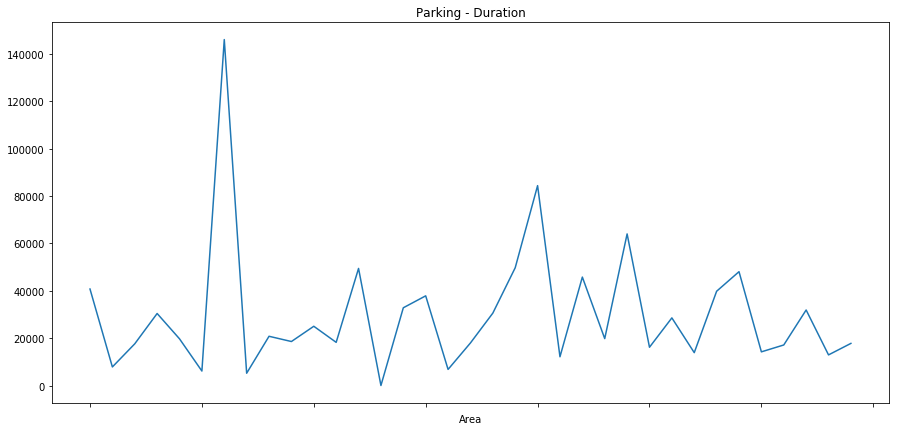

In [7]:
fig, ax = plt.subplots(figsize=(15,7))
fake_parking_16.groupby(['Area']).count()['DurationSeconds'].plot(ax=ax)
plt.title('Parking - Duration')
plt.show()

In [8]:
# FInd average Duration of stay in a given street
sign_duration = fake_parking_16.groupby('Sign', as_index=False)['DurationSeconds'].mean()

In [9]:
sign_duration.head()

,Sign,DurationSeconds
0,1/2 p mtr < > 6.00am to 11.00pm,1326.046771
1,1/2p a rpe m-f 7:30-18:30,4402.277641
2,1/2p a rpe m-sun 7:30-23:00,7588.332326
3,1/2p a rpe sat 7:30-12:30,3084.178571
4,1/2p aot rpe 7.30 - 6.30,2389.098067


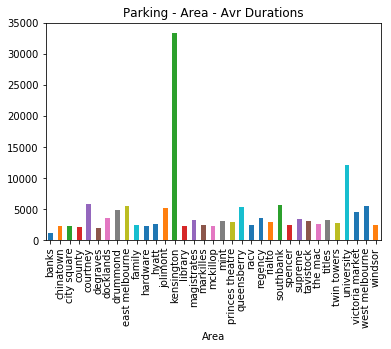

In [10]:
# Bar chart for average stay durations for each area
plt.title('Parking - Area - Avr Durations')
duration_chart = fake_parking_16.groupby(['Area'])['DurationSeconds'].mean()

duration_chart.plot.bar()
plt.show()

In [11]:
fake_parking_16["In Violation"].value_counts()

False    1006726
True       41849
Name: In Violation, dtype: int64

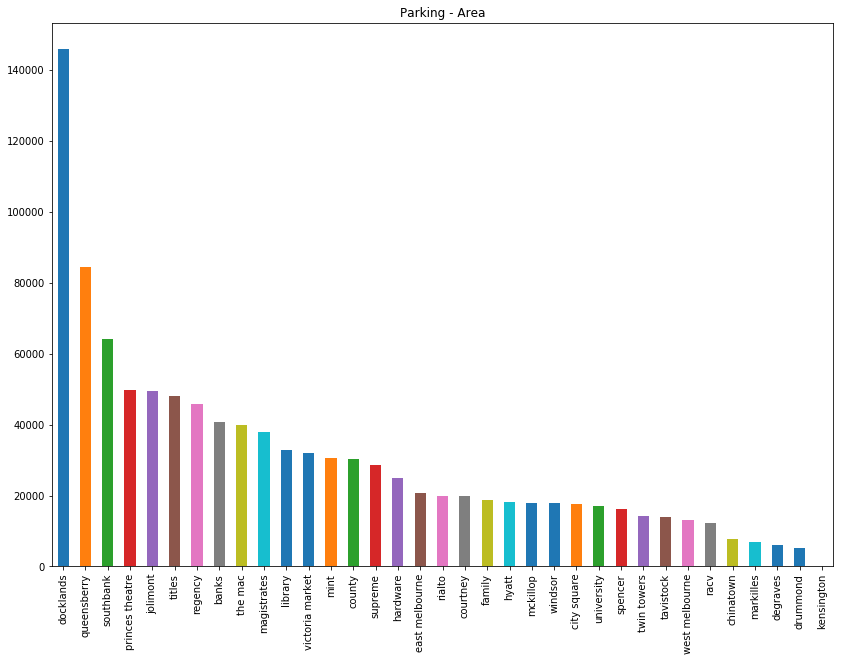

In [12]:
#visualisation for area column
fake_parking_16["Area"].value_counts().plot(kind='bar',figsize=(14,10))
plt.title('Parking - Area')
plt.show()

In [13]:
fake_parking = fake_parking_16

# Drops meaningless columns from dataset
fake_parking_16 = fake_parking_16.drop(columns='DeviceId')
fake_parking_16 = fake_parking_16.drop(columns='StreetId')
fake_parking_16 = fake_parking_16.drop(columns='Side Of Street')
fake_parking_16 = fake_parking_16.drop(columns='StreetMarker')

In [14]:
fake_parking_16.head()

,ArrivalTime,DepartureTime,DurationSeconds,Sign,Area,StreetName,BetweenStreet1,BetweenStreet2,In Violation,Vehicle Present
0,8/09/2016 15:59,8/09/2016 16:18,1164,lz 30m m-sun 7:30-18:30,docklands,docklands drive,pearl river road,waterfront way,False,False
1,12/26/2016 02:08:01 pm,12/26/2016 02:09:27 pm,86,1p tkt a m-sat 7:30-18:30,the mac,la trobe street,elizabeth street,swanston street,False,False
2,10/07/2016 7:30,10/07/2016 8:25,3300,1p tkt a m-f 7:30-18:30,southbank,coventry street,sturt street,dodds street,False,False
3,10/20/2016 08:24:40 am,10/20/2016 08:40:21 am,941,2p mtr m-f 7:30-16:00,twin towers,flinders street,exhibition street,spring street,False,True
4,11/30/2016 01:42:36 pm,11/30/2016 02:19:39 pm,2223,1/4p m-sat 7:30-19:30,victoria market,therry street,queen street,elizabeth street,True,True


In [15]:
# Set up features from column headings
features = list(fake_parking_16.columns[:10])

In [16]:
print "* features:", features

* features: ['ArrivalTime', 'DepartureTime', 'DurationSeconds', 'Sign', 'Area', 'StreetName', 'BetweenStreet1', 'BetweenStreet2', 'In Violation', 'Vehicle Present']


In [17]:
# Function to encode targets and features from teh data frame for various analysis tasks
def encode_target(fake_parking_16, target_column):
    """Add column to data frame with integers for the target.

    Args
    ----
    fake_parking_16 -- pandas DataFrame.
    target_column -- column to map to int, producing
                     new Target column.

    Returns
    -------
    parking_16_analysis -- modified DataFrame.
    targets -- list of target names.
    """
    parking_16_analysis = fake_parking_16.copy()
    targets = parking_16_analysis[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    parking_16_analysis["Target"] = parking_16_analysis[target_column].replace(map_to_int)

    return (parking_16_analysis, targets)

In [18]:
Streets_parking_data, targets = encode_target(fake_parking_16, "StreetName")

In [19]:
print "* Streets_parking_data.head()", Streets_parking_data[["Target", "StreetName"]].head()

* Streets_parking_data.head()    Target       StreetName
0       0  docklands drive
1       1  la trobe street
2       2  coventry street
3       3  flinders street
4       4    therry street


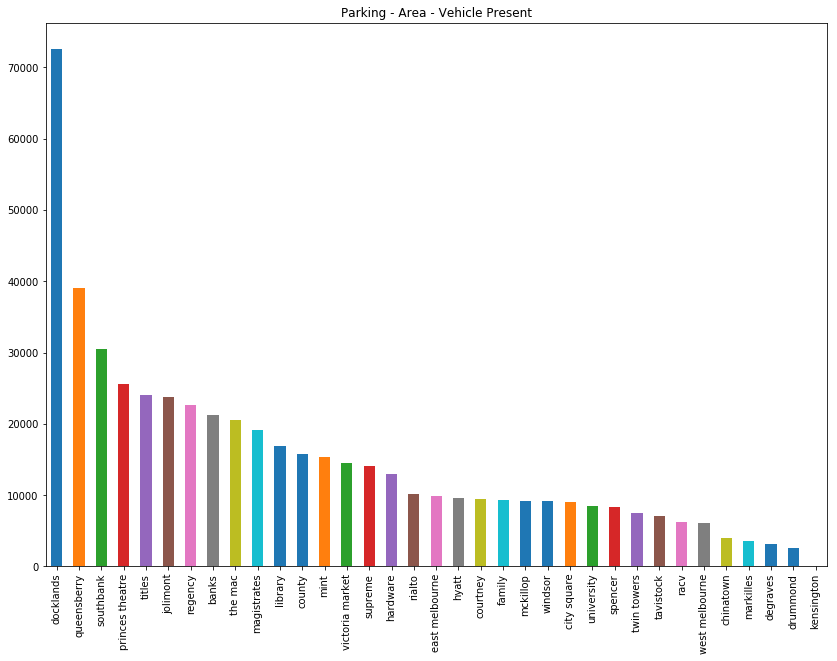

In [23]:
area_vehicle_present = fake_parking_16[['Area','Vehicle Present']]

area_vehicle_present_true = area_vehicle_present[area_vehicle_present['Vehicle Present']==True]

area_vehicle_present_true["Area"].value_counts().plot(kind='bar',figsize=(14,10))
plt.title('Parking - Area - Vehicle Present')
plt.show()

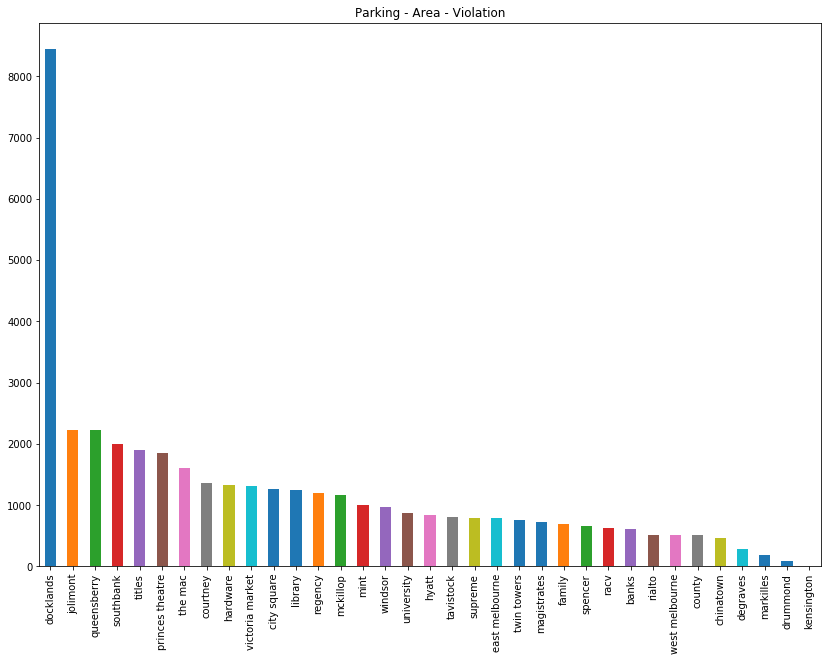

In [24]:
general_area_violation = fake_parking_16[['Area','In Violation']]

general_area_violation_true = general_area_violation[general_area_violation['In Violation']==True]

general_area_violation_true["Area"].value_counts().plot(kind='bar',figsize=(14,10))
plt.title('Parking - Area - Violation')
plt.show()


In [25]:
area_violation = pd.DataFrame(columns=['Area', 'Used', 'Violation'])

area_violation["Area"] = fake_parking_16["Area"].values
area_violation["Used"] = fake_parking_16["Vehicle Present"].values
area_violation["Violation"] = fake_parking_16["In Violation"].values

area_violation = area_violation[area_violation.Used != False]

area_violation.head(100)


,Area,Used,Violation
3,twin towers,True,False
4,victoria market,True,True
5,southbank,True,False
6,library,True,False
9,supreme,True,False
10,docklands,True,False
12,courtney,True,False
15,twin towers,True,False
18,family,True,False
20,princes theatre,True,False


Text(0.5,1,'Average Violation Rate')

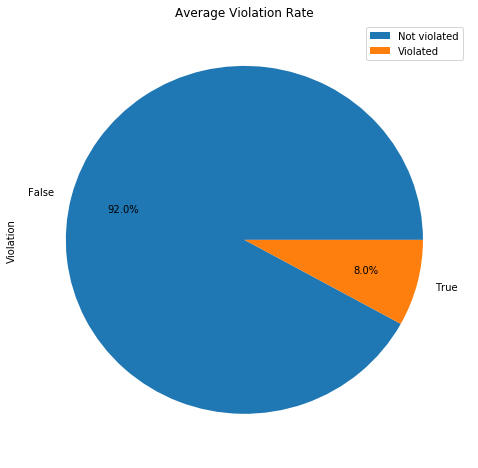

In [26]:
area_violation["Violation"].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1)
plt.gca().legend(('Not violated','Violated'))
plt.title("Average Violation Rate")

In [27]:
outter_area = ["docklands","jolimont","queensberry","southbank","titles","courtney","east melbourne","spencer","west melbourne","markilles","drummond","kensington"]

outer_violation = area_violation[area_violation.Area.isin(outter_area)]
inner_violation = area_violation[~area_violation.Area.isin(outter_area)]

Text(0.5,1,'Violation Rate in Outer Suburbs')

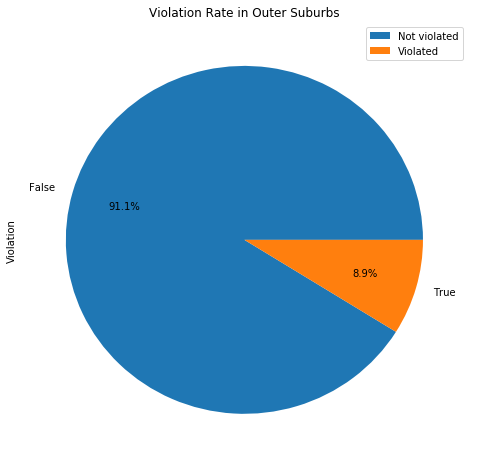

In [28]:
outer_violation["Violation"].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1)
plt.gca().legend(('Not violated','Violated'))
plt.title("Violation Rate in Outer Suburbs")

Text(0.5,1,'Violation Rate in the CBD')

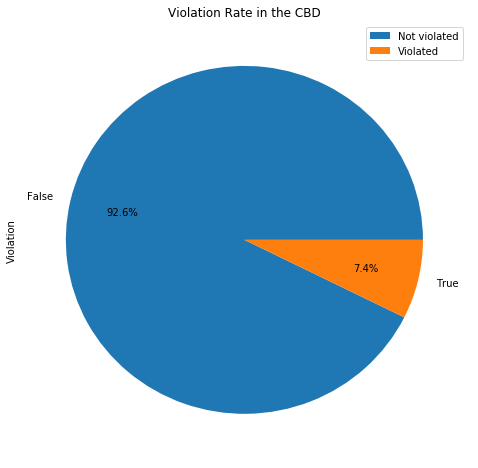

In [29]:
inner_violation["Violation"].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1)
plt.gca().legend(('Not violated','Violated'))
plt.title("Violation Rate in the CBD")

In [30]:
area_usage = pd.DataFrame(columns=['Area', 'Used'])

area_usage["Area"] = fake_parking_16["Area"].values
area_usage["Used"] = fake_parking_16["Vehicle Present"].values

area_usage.head()


,Area,Used
0,docklands,False
1,the mac,False
2,southbank,False
3,twin towers,True
4,victoria market,True


In [31]:
outter_area = ["docklands","jolimont","queensberry","southbank","titles","courtney","east melbourne","spencer","west melbourne","markilles","drummond","kensington"]

outer_usage = area_usage[area_usage.Area.isin(outter_area)]
inner_usage = area_usage[~area_usage.Area.isin(outter_area)]

outer_usage.head()

,Area,Used
0,docklands,False
2,southbank,False
5,southbank,True
10,docklands,True
11,titles,False


(-1.25, 1.25, -1.25, 1.25)

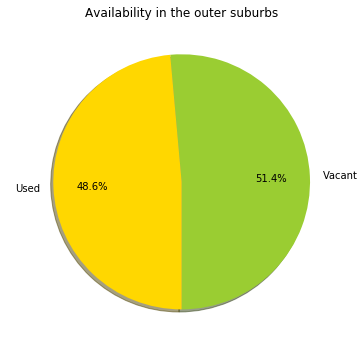

In [32]:
outer_usage["Used"].value_counts().plot(kind='pie',figsize=(5,5), autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1, labels = ['Vacant', 'Used'], colors = ['yellowgreen', 'gold'], shadow=True, startangle=-90)
plt.title("Availability in the outer suburbs")
plt.tight_layout()
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

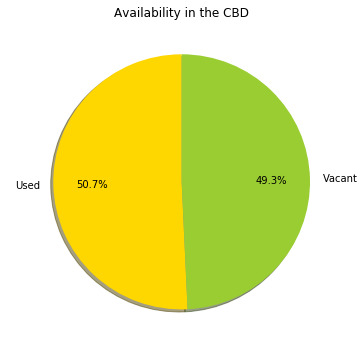

In [33]:
inner_usage["Used"].value_counts().plot(kind='pie',figsize=(5,5), autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1, labels = ['Used', 'Vacant'], colors = ['gold', 'yellowgreen'], shadow=True, startangle=90)
plt.title("Availability in the CBD")
plt.tight_layout()
plt.axis('off')

In [34]:
#Data Exploration
#Explore each column

fake_parking_16["StreetName"].value_counts()

lonsdale street             78691
queen street                77272
bourke street               62516
exhibition street           50447
collins street              44486
franklin street             43301
la trobe street             42435
king street                 38016
lt lonsdale street          37449
russell street              35778
william street              35178
errol street                23398
spring street               22007
albert street               20501
lt collins street           19147
a'beckett street            18792
elizabeth street            14644
flinders lane               14198
lt bourke street            14133
clarendon street            13333
spencer street              13188
coventry street             12290
victoria street             11009
grant street                10714
capel street                10111
kavanagh street             10054
harbour esplanade           10008
lansdowne street             9999
queensberry street           9364
caravel lane  

In [35]:
fake_parking.head()

,DeviceId,ArrivalTime,DepartureTime,DurationSeconds,StreetMarker,Sign,Area,StreetId,StreetName,BetweenStreet1,BetweenStreet2,Side Of Street,In Violation,Vehicle Present
0,14632,8/09/2016 15:59,8/09/2016 16:18,1164,13812n,lz 30m m-sun 7:30-18:30,docklands,590.0,docklands drive,pearl river road,waterfront way,3.0,False,False
1,19325,12/26/2016 02:08:01 pm,12/26/2016 02:09:27 pm,86,3761s,1p tkt a m-sat 7:30-18:30,the mac,856.0,la trobe street,elizabeth street,swanston street,4.0,False,False
2,15078,10/07/2016 7:30,10/07/2016 8:25,3300,9453s,1p tkt a m-f 7:30-18:30,southbank,547.0,coventry street,sturt street,dodds street,4.0,False,False
3,13517,10/20/2016 08:24:40 am,10/20/2016 08:40:21 am,941,1596n,2p mtr m-f 7:30-16:00,twin towers,670.0,flinders street,exhibition street,spring street,3.0,False,True
4,19878,11/30/2016 01:42:36 pm,11/30/2016 02:19:39 pm,2223,7041s,1/4p m-sat 7:30-19:30,victoria market,1346.0,therry street,queen street,elizabeth street,4.0,True,True


In [36]:
fake_parking.dtypes

DeviceId             int64
ArrivalTime         object
DepartureTime       object
DurationSeconds      int64
StreetMarker        object
Sign                object
Area                object
StreetId           float64
StreetName          object
BetweenStreet1      object
BetweenStreet2      object
Side Of Street     float64
In Violation          bool
Vehicle Present       bool
dtype: object

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

In [42]:
fake_parking["StreetName"].value_counts()

lonsdale street             78691
queen street                77272
bourke street               62516
exhibition street           50447
collins street              44486
franklin street             43301
la trobe street             42435
king street                 38016
lt lonsdale street          37449
russell street              35778
william street              35178
errol street                23398
spring street               22007
albert street               20501
lt collins street           19147
a'beckett street            18792
elizabeth street            14644
flinders lane               14198
lt bourke street            14133
clarendon street            13333
spencer street              13188
coventry street             12290
victoria street             11009
grant street                10714
capel street                10111
kavanagh street             10054
harbour esplanade           10008
lansdowne street             9999
queensberry street           9364
caravel lane  

In [ ]:
fake_parking = fake_parking.drop(columns='ArrivalTime')
fake_parking = fake_parking.drop(columns='DepartureTime')
fake_parking = fake_parking.drop(columns='StreetMarker')
fake_parking = fake_parking.drop(columns='Sign')
fake_parking = fake_parking.drop(columns='StreetName')
fake_parking = fake_parking.drop(columns='Area')
fake_parking = fake_parking.drop(columns='BetweenStreet1')
fake_parking = fake_parking.drop(columns='BetweenStreet2')
fake_parking = fake_parking.drop(columns='StreetId')
fake_parking = fake_parking.drop(columns='Side Of Street')

fake_parking.info()

In [ ]:
#Check null value in data.
fake_parking.isnull().sum()

In [ ]:
label_violation = LabelEncoder()

In [ ]:
fake_parking['In Violation'] = label_violation.fit_transform(fake_parking['In Violation'])

In [ ]:
fake_parking.head()

In [ ]:
fake_parking['In Violation'].value_counts()

In [ ]:
sns.countplot(fake_parking['In Violation'])

In [ ]:
#Now seperate the dataset as response variable and feature variables
X = fake_parking.drop('In Violation', axis = 1)
y = fake_parking['In Violation']

In [ ]:
#Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train[:10]

# Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

# Neural Network

In [ ]:
mlpc = MLPClassifier(hidden_layer_sizes=(3,3,3), max_iter=50)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))